### **Question 1: Creating and Exploring Data with Numpy** ###

In [11]:
# Importing numpy and pandas libraries 
import numpy as np    # Good for working with numerical data
import pandas as pd   # Good for working with tables (rows and columns)

# Setting a random seed so the results are reproducible for both me and you
np.random.seed(42)     # np.random.seed(42) sets the "starting point" for NumPy's random number generator
                       # Without this line: Every time I ran the script, I got different random numbers and a slightly different simulated dataset.
                       # With this line: I will always get the same sequence of random numbers 
                       # You can apparently use any seed number, and it will work (I saw 42 and used it because apparently it is commonly used?)
                       # Link: https://www.slingacademy.com/article/numpy-random-seed-explained-with-examples/ 

# 1. Defining the study parameters (as per assignment instructions)

n_participants = 40              # Total number of participants
trials_per_condition = 50        # Number of congruent and incongruent trials per person
conditions = ["congruent", "incongruent"]   # These are the two conditions that were specified

# Lists to store the simulated data before creating a DataFrame
participant_column = []   # will store participant IDs (1–40, repeated many times)
condition_column = []     # will store the condition label for each trial
rt_column = []            # will store the simulated RT for each trial

                          # After data simulation, all three lists will have the same length:
                             # = total_rows = n_participants * trials_per_condition * number_of_conditions
                             # = 40 * 50 * 2
                             # = 4000 rows

# 2. Looping over each of the participants and conditions

for participant_id in range(1, n_participants + 1):   # Outer loop: Goes through each participant one by one.
                                                      # range(1, n_participants + 1) generates the integers: 1, 2, 3, ..., 40

    for condition in conditions:      # Inner loop: For the current participant, loop through each condition.
                                      # So for each participant: It will go through congruent trials and then incongruent trials

        # Generate reaction times based on the condition (i.e., Congruent trials: mean 520 ms, SD 70 ms; Incongruent trials: mean 610 ms, SD 70 ms)
        if condition == "congruent":  # If the condition is congruent
            base_rts = np.random.normal(   # Using np.random.normal() to generate RT values that are *normally distributed* 
                                           # *normally distributed* around the specified mean with the specified st.dev.
                loc=520,                   # loc = mean of the distribution
                scale=70,                  # scale = standard deviation
                size=trials_per_condition  # size = how many values to generate (i.e., how many trials)
            )
        else:  # If the condition is not "congruent", it must be "incongruent"
            base_rts = np.random.normal(
                loc=610,
                scale=70,
                size=trials_per_condition
            )

        rand_noise = np.random.uniform(  # Adding uniform random noise between -20 and +20 ms to each RT (uniformly distributed between -20 and +20 ms)
            low=-20,   # minimum possible noise value
            high=20,   # maximum possible noise value
            size=trials_per_condition
        )

        # Final RTs = base RTs + the random noise
        rts = base_rts + rand_noise    # So each trial's RT = base RT + its own small uniform noise

        # Save these values into the lists created above
        participant_column.extend([participant_id] * trials_per_condition)  # This creates a list like [participant_id, ..., participant_id]
                                                                            # with length = trials_per_condition, and then extends the main list with it
        
        condition_column.extend([condition] * trials_per_condition)         # Similarly, this adds the condition string repeated trials_per_condition times
        
        rt_column.extend(rts)        # rts is already a collection (NumPy array) of RT values, so we extend rt_column with all those values.

# 3. Creating the DataFrame from the collected lists above

# At this point:
    # - participant_column contains one entry per trial, indicating which participant it is
    # - condition_column contains one entry per trial, indicating which condition it is (congruent vs. incongruent)
    # - rt_column contains one entry per trial with the simulated RT value

# All three lists should be the same length (4000 entries each)
# Now I need to combine them into a pandas DataFrame, which is like a table with named columns. 
# Each row = one trial.

df = pd.DataFrame({
    "participant": participant_column,   # column 1: participant ID (1–40)
    "condition": condition_column,       # column 2: "congruent" or "incongruent"
    "rt": rt_column                      # column 3: reaction time in ms 
})

# 4. Finally, I need to display the first 10 rows and summary stats (as per assignment instructions)

print("FIRST 10 ROWS OF DATA:")
print(df.head(10))   # This piece of code actually shows the first 10 rows of the DataFrame
                     # This is a quick way to visually check the structure, and values 

print("\nSUMMARY STATISTICS:")   
print(df.describe())  # df.describe() computes summary statistics (for numeric columns only): 
                            # count  = how many values there are (should be 4000)
                            # mean   = average
                            # std    = standard deviation
                            # min    = minimum
                            # 25%    = 25th percentile (lower quartile)
                            # 50%    = median
                            # 75%    = 75th percentile (upper quartile)
                            # max    = maximum
                     # This is useful to confirm that the simulated RTs are roughly in the expected range 
                     # Link: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

FIRST 10 ROWS OF DATA:
   participant  condition          rt
0            1  congruent  540.406960
1            1  congruent  522.409378
2            1  congruent  548.320223
3            1  congruent  646.087567
4            1  congruent  514.499055
5            1  congruent  491.559040
6            1  congruent  610.765782
7            1  congruent  586.338888
8            1  congruent  495.411087
9            1  congruent  567.139490

SUMMARY STATISTICS:
       participant           rt
count   4000.00000  4000.000000
mean      20.50000   564.611748
std       11.54484    84.289731
min        1.00000   288.808680
25%       10.75000   506.469466
50%       20.50000   563.672497
75%       30.25000   622.802407
max       40.00000   841.950310


### **Question 2: Loading and Cleaning Data with Pandas** ###

In [6]:
# The DataFrame from Question 1 is called df, and it contains 4000 rows (40 participants × 2 conditions × 50 trials each).

# 1. Now I need to remove trials with RTs below 150 ms or above 1500 ms (using indexing)

# Indexing means selecting just the rows that meet a condition.
# I want to keep ONLY the rows where:
    #  RT is >= 150 AND RT is <= 1500

clean_df = df[(df["rt"] >= 200) & (df["rt"] <= 750)]

# 2. Now I need to print how many trials were removed 

original_rows = len(df)        # Count original number of rows

cleaned_rows = len(clean_df)   # Count remaining rows after cleaning

removed_rows = original_rows - cleaned_rows  # Number removed = original - cleaned

print(f"Number of trials removed: {removed_rows}")

# 3. Now I need to create a cleaned DataFrame

# I have already created clean_df in the above step
# But I now need to print the first few rows to confirm it looks correct.

print("\nFirst 10 rows of the CLEANED DataFrame:")
print(clean_df.head(10))   # It originally showed that were removed (likely because there are no trials below 150 or above 1500 - I checked this).
                           # I changed this to as low as 200 and as high as 750 - Now this shows 47 trials were removed (so I know it worked). 

Number of trials removed: 47

First 10 rows of the CLEANED DataFrame:
   participant  condition          rt
0            1  congruent  540.406960
1            1  congruent  522.409378
2            1  congruent  548.320223
3            1  congruent  646.087567
4            1  congruent  514.499055
5            1  congruent  491.559040
6            1  congruent  610.765782
7            1  congruent  586.338888
8            1  congruent  495.411087
9            1  congruent  567.139490


#### **Understanding the group by code** ####

In [7]:
# Full code given: by_participant = clean_df.groupby(["participant", "condition"])["rt"].mean().reset_index()

# I need to break this code down step by step:

# clean_df.groupby(["participant", "condition"]) → groups the data by participant AND condition.
    # That means each participant has:
        # One group for their congruent trials
        # One group for their incongruent trials

# ["rt"]
    # This selects the rt column *within each of those groups*

# .mean()
    # Would actually calculate the average RT for each participant by condition group

# .reset_index()
    # This part of the code turns the grouped results back into a normal DataFrame with its own row numbers rather than a hierarchical index
    # Link: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html

# So the final DataFrame (by_participant) contains:
    # One row per participant per condition
    # Columns: participant, condition, mean RT

by_participant = clean_df.groupby(["participant", "condition"])["rt"].mean().reset_index()

print("\nMEAN RTs per participant by condition:")
print(by_participant.head(20))  # prints 20 rows


MEAN RTs per participant by condition:
    participant    condition          rt
0             1    congruent  503.506325
1             1  incongruent  600.615976
2             2    congruent  521.078590
3             2  incongruent  621.527642
4             3    congruent  527.724791
5             3  incongruent  599.793551
6             4    congruent  523.319340
7             4  incongruent  591.976252
8             5    congruent  519.062742
9             5  incongruent  615.058033
10            6    congruent  526.018354
11            6  incongruent  618.112553
12            7    congruent  537.894543
13            7  incongruent  601.222107
14            8    congruent  523.036079
15            8  incongruent  600.703890
16            9    congruent  536.702745
17            9  incongruent  604.064175
18           10    congruent  535.749465
19           10  incongruent  611.305763


### **Question 3: Merging DataFrames:** ###

In [13]:
# I have already ran something like:
    # clean_df = df[(df["rt"] >= 150) & (df["rt"] <= 1500)]
    # so clean_df only contains trials with reasonable RTs 

# 1. First, I need to compute the mean RT for each condition WITHOUT using groupby (using boolean masks and .mean())

    # A "boolean mask" is just a Series of True/False values that I can use to select rows from the DataFrame

congruent_mask = clean_df["condition"] == "congruent"      # Mask for congruent trials: True where condition == "congruent"

incongruent_mask = clean_df["condition"] == "incongruent"  # Mask for incongruent trials: True where condition == "incongruent"

# Then .mean() computes the average RT for that subset of rows.

mean_rt_congruent = clean_df.loc[congruent_mask, "rt"].mean()    # Using .loc[mask, "rt"] selects the RT values ONLY for rows where the mask is True.
                                                                 # Then .mean() computes the average RT for that subset of rows.
                                                                   # Link 1: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html
                                                                   # Link 2: https://pandas.pydata.org/docs/user_guide/indexing.html
mean_rt_incongruent = clean_df.loc[incongruent_mask, "rt"].mean()

print("Mean RT (CLEANED data, all trials):")
print(f"  Congruent   : {mean_rt_congruent:.2f} ms")
print(f"  Incongruent : {mean_rt_incongruent:.2f} ms")

# 2. Adding an "accuracy" column (1 = correct, 0 = incorrect) with an 80% chance of being 1

#  I want each trial to be marked as: '1' (correct)  with probability 0.80 AND '0' (incorrect) with probability 0.20

n_trials = len(clean_df)  # total number of rows in the cleaned DataFrame

clean_df.loc[:, "accuracy"] = np.random.choice( # np.random.choice allows us to randomly choose from [0, 1] with specified probabilities
                      # The ':' signals that I am explicitly targeting all rows and one column inside the DataFrame
                         # I did not have the ':' there before, and I was getting a warning 
                         # When I searched it up, it said that it could be because it could just be modifying a slice of data created before 
                      # So essentially, clean_df.loc[:, "accuracy"] means “select the accuracy column for all rows in the real DataFrame
                          # so Pandas knows exactly where to assign the new values.
    [0, 1],           # These are the values I want to randomly choose between (as specified above)
    size=n_trials,    # One accuracy value per trial (n_trials is the number of trials)
    p=[0.20, 0.80]    # These are the probabilities: 20% for 0, 80% for 1
)

# Now clean_df has a new column called "accuracy" where most trials (about 80%) should be 1s.

# 3. Now I should re-calculate the mean RT for each condition, but ONLY for accurate trials (accuracy == 1)

# First, I need to filter the DataFrame so the code only keeps the accurate trials.
accurate_df = clean_df[clean_df["accuracy"] == 1]

# Now I need to use groupby to compute mean RT separately for each condition type
    # accurate_df.groupby("condition") → groups all rows by the "condition" column.
    # Here I should get two groups: one for "congruent" and one for "incongruent".
        # ["rt"] → within each group, we focus on the RT values.
        # .mean() → compute the mean RT for each condition.
# The result is a small Series (or DataFrame) giving mean RT per condition but only for trials where accuracy == 1.

mean_rt_by_condition_accurate = accurate_df.groupby("condition")["rt"].mean()

print("\nMean RT (CLEANED data, ACCURATE trials only):")
print(mean_rt_by_condition_accurate)   # This displays mean RTs for each condition AFTER filtering to only accurate trials

Mean RT (CLEANED data, all trials):
  Congruent   : 519.80 ms
  Incongruent : 605.20 ms

Mean RT (CLEANED data, ACCURATE trials only):
condition
congruent      518.99372
incongruent    605.72468
Name: rt, dtype: float64


### **Question 4: Plotting with Matplotlib** ###

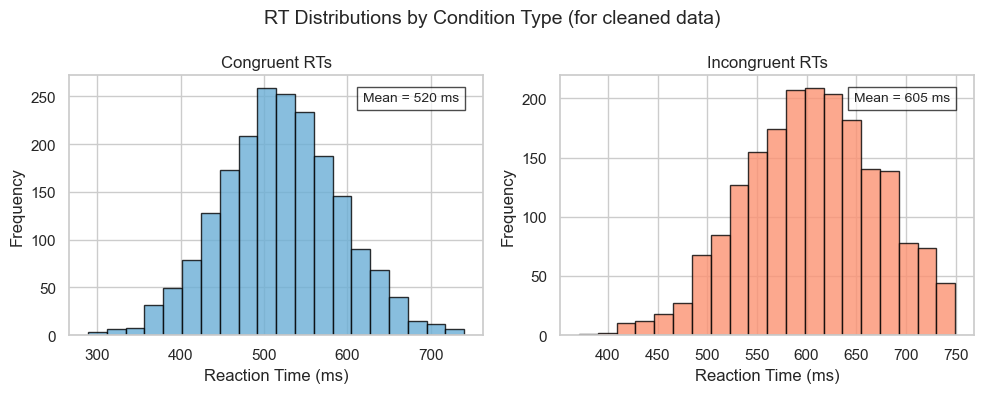

In [48]:
# I am using clean_df here because this is the CLEANED dataset I created in Question 3

# I need to first import numpy and matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Now I need to separate out the RTs for each condition using boolean masks (again, these are coming from the CLEANED data)
congruent_rts = clean_df.loc[clean_df["condition"] == "congruent", "rt"]
incongruent_rts = clean_df.loc[clean_df["condition"] == "incongruent", "rt"]

# Before I plot anything, I need to compute the mean RTs so I can annotate them inside the graphs 
# I decided to do this later as something I am adding/changing about the default graphs
mean_congruent = congruent_rts.mean()
mean_incongruent = incongruent_rts.mean()

# Next, I need to create a figure with 2 subplots next to each other (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))   # making the figure wider so each histogram has space

# Now I am onto creating a histogram for the CONGRUENT trials (using the CLEANED reaction times)
axes[0].hist(          # Link: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
    congruent_rts,     # The actual RT values I want to plot for the congruent condition
    bins=20,           # I chose 20 bins so the histogram has more detail than the default
    alpha=0.8,         # It will be slightly transparent to make the bars visually softer/nicer
    edgecolor="black", # The plot will be outlined in black
    color="#6baed6")   # I wanted this plot to be light blue colour (the bars themselves)
                         # Link: https://matplotlib.org/stable/users/explain/colors/colors.html

# Adding the mean RT directly inside the plot for easy interpretation
axes[0].text(       # I want to add text onto the first subplot (i.e., the mean congruent RT; rounded)
    0.71, 0.90,     # x and y positions of the text within the axes
    f"Mean = {mean_congruent:.0f} ms",  # This formats the mean as a whole number with no decimals (using an f-string) - ms adds milliseconds after the #
    transform=axes[0].transAxes,    # This line interprets the coordinates as axes coordinates, not new data values.
    fontsize=10,    # This sets the size of the text.
    bbox=dict(facecolor="white", alpha=0.7, edgecolor="black")) # This adds a background box behind the text so the words don’t get lost
                                                              # facecolor = white box
                                                              # alpha = 70% transparent
                                                              # edgecolor = There will be a black border around the text box

# Labelling the axes and giving a title for the first histogram
axes[0].set_title("Congruent RTs")       # Title of this graph
axes[0].set_xlabel("Reaction Time (ms)") # This is the x-axis label/title
axes[0].set_ylabel("Frequency")          # This is the y-axis label/title

# Next, I am doing the same thing as above, but for the histogram for the INCONGRUENT trials (also using CLEANED data)
axes[1].hist(
    incongruent_rts,
    bins=20,
    alpha=0.8,
    edgecolor="black",
    color="#fc9272")    # a light red colour (to differentiate the two graphs side by side)

# Adding the mean RT text for this condition too
axes[1].text(
    0.71, 0.90,
    f"Mean = {mean_incongruent:.0f} ms",
    transform=axes[1].transAxes,
    fontsize=10,
    bbox=dict(facecolor="white", alpha=0.7, edgecolor="black"))

# Labelling the axes and giving a title for the second histogram
axes[1].set_title("Incongruent RTs")
axes[1].set_xlabel("Reaction Time (ms)")
axes[1].set_ylabel("Frequency")

# Overarching title for the whole figure
plt.suptitle("RT Distributions by Condition Type (for cleaned data)", fontsize=14)

plt.tight_layout()   # Automatically adjusts spacing so titles, labels, and plots do not overlap
plt.show()    # Need this for the plot to appear (I did not work in class for plots if I did not include this)


### **Question 5: Plotting with Seaborn** ###

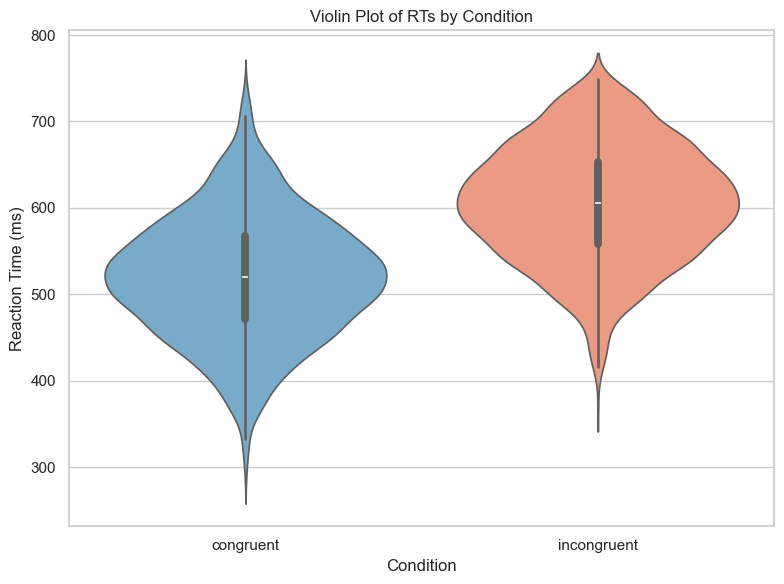

In [50]:
# Importing seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")   # This ensures that a clean white grid style for all seaborn plots

plt.figure(figsize=(8, 6))  # Creates a new figure with a specific size

# Creating a violin plot - Each "violin" shows the RT distribution for one condition
sns.violinplot(         # Link for the documentation used: https://seaborn.pydata.org/generated/seaborn.violinplot.html
    data=clean_df,      # I want to use the cleaned RT DataFrame
    x="condition",      # Condition is on the x-axis (i.e., congruent vs incongruent)
    y="rt",             # Reaction time is on the y-axis
    hue="condition",    # This tells seaborn to colour the plots by condition
    palette=["#6baed6", "#fc9272"]) # I want congruent to be a lighter blue, and incongruent to be a light red/orange)

plt.title("Violin Plot of RTs by Condition")  # Giving the violin plot a title
plt.xlabel("Condition")   # Labelling the x-axis as "condition"
plt.ylabel("Reaction Time (ms)")  # labelling the y-axis as "RT (ms)"

plt.tight_layout()   # Again, this automatically adjusts spacing so titles, labels, and plots do not overlap
plt.show()     # Again, I need this for the plot to appear 

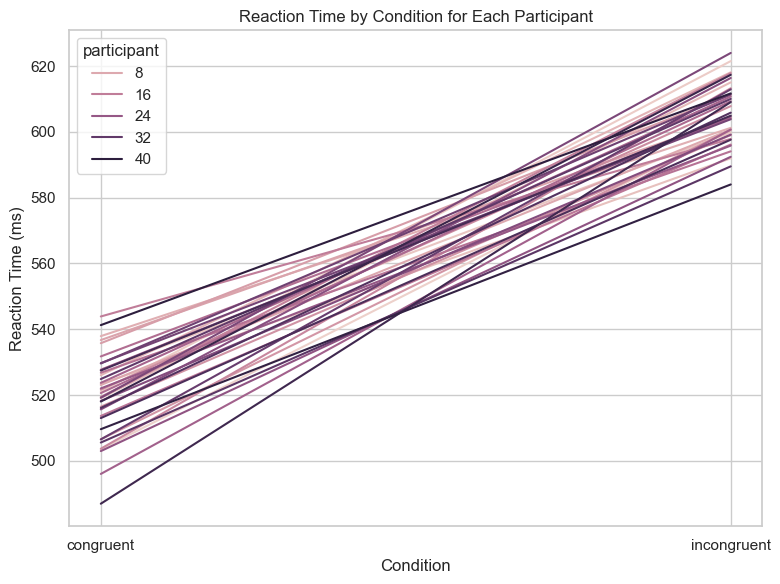

In [60]:
plt.figure(figsize=(8, 6))  # Used the same size as above violin plot

# Creating a line plot - With condition on the x-axis and RT on the y-axis, using different hues for each participant
sns.lineplot(     # Link for documentation: https://seaborn.pydata.org/generated/seaborn.lineplot.html
    data=clean_df,      # Want again want to use the cleaned dataframe
    x="condition",      # x-axis: condition (congruent vs incongruent)
    y="rt",             # y-axis: reaction time in ms
    hue="participant",  # This tells seaborn to colour the plots by participant(i.e., assuming this is what you meant by using a different hue per participant)       
    estimator="mean",   # This is the average RT per participant × condition (i.e., aggregating across multiple observations of the y variable at the same x level).
    errorbar=None)      # I do not want error bars (keeps it simple and clean) - with them on as the default, it looked insane...


plt.title("Reaction Time by Condition for Each Participant") # Giving the plot a title
plt.xlabel("Condition")     # Labelling the x-axis 
plt.ylabel("Reaction Time (ms)")  # labelling the y-axis 

plt.tight_layout()  # Adjusts spacing
plt.show()      # Shows plot

### **Question 6: Curve Fitting for Visual Short Term Memory Capacity** ###

C:\Users\tinne\AppData\Local\Temp\ipykernel_20856\3938901142.py:50: OptimizeWarning: Covariance of the parameters could not be estimated
  two_stage_params, _ = curve_fit(                  # Need to run curve_fit and store the best-fitting parameters


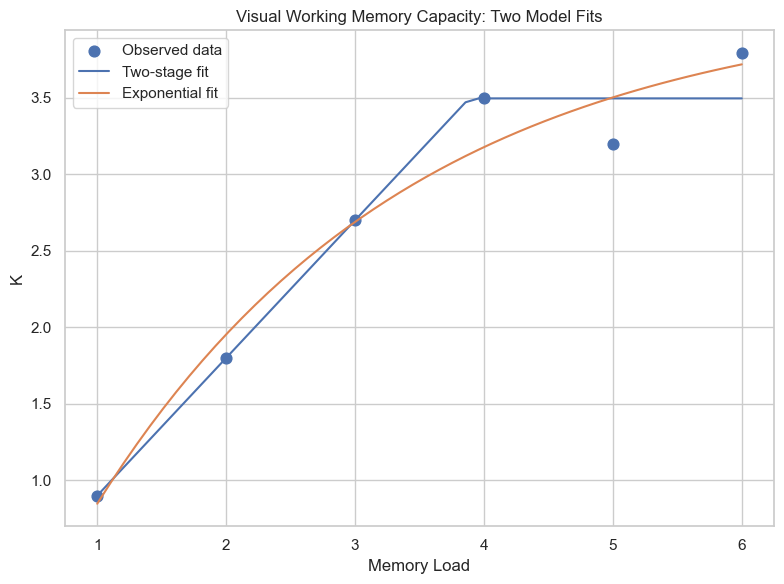

=== Two-stage model parameters ===
  a:         0.90
  b:         -0.00
  k_break:   3.89

=== Exponential model parameters ===
  A:   4.97
  B:   0.41
  C:   -0.82


In [82]:
# First, I need to import numpy, matplotlib and scipy.optimize 

import numpy as np                      # Used for numerical operations
import matplotlib.pyplot as plt         # For plotting 
from scipy.optimize import curve_fit    # For the curve fitting function (link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

# STEP 1: I need to put the data into clearly-named variables

memory_loads = np.array([1, 2, 3, 4, 5, 6])              # x-values: number of items to remember
capacity_scores = np.array([0.9000, 1.8000, 2.7000,      # y-values: estimated K at each load
                            3.5000, 3.1966, 3.7939])


# STEP 2: I need to define the TWO models 

# Model 1: The linear then flat" model 
    # Idea: capacity grows linearly until a breakpoint, then levels off.
    # Parameters:
    #   a        = slope of the growing part
    #   b        = intercept of the line
    #   k_break  = load where growth stops and memory capacity maxes out

def two_stage_capacity(load, a, b, k_break):
    # If load <= k_break → use linear formula a*load + b (growth stage)
    # If load >  k_break → stay at the value at k_break (plateau stage)
    return np.where(load <= k_break,
                    a * load + b,      # the growth stage
                    a * k_break + b)   # plateau stage (memory capacity limit)

# Model 2: The exponential model
    # Idea: capacity jumps up quickly at low loads, then slowly approaches a maximum.
    # Formula: y = A * (1 - exp(-B * load)) + C
    # Parameters:
    #   A = the maximum capacity the exponential model approaches
    #   B = rate of growth
    #   C = the baseline K value before any meaningful capacity growth happens

def exponential_capacity(load, A, B, C):
    return A * (1 - np.exp(-B * load)) + C

# ==================================================================================================================
# STEP 3: Use curve_fit to find the best parameters (This is where I was a bit lost and used a bit of AI to help me)

# Fitting the two-stage (linear then flat) model 
initial_guess_two_stage = [1.0, 0.0, 3.0]                 # These are the starting guesses: a, b, k_break
                                                              # Early K values increase by roughly 1 per load (suggesting a slope near 1)
                                                              # The line appears to pass near 0 (suggesting an intercept near 0)
                                                              # Capacity seems to level off around loads 3–4 (suggesting a breakpoint near 3)

two_stage_params, _ = curve_fit(                  # Need to run curve_fit and store the best-fitting parameters
    two_stage_capacity,                           # This is the model function defined above
    memory_loads,                                 # The x-data
    capacity_scores,                              # The y-data
    p0=initial_guess_two_stage)                   # Initial guesses that I defined above (if left at 0, values would have been 1, which aren't accurate)


a_fit, b_fit, k_break_fit = two_stage_params      # Unpacking the fitted values (splits the array into three individual variables)
                                                    # a_fit = best slope, b_fit = best intercept, k_break_fit = best breakpoint

# ===================================================================================================================
# Fitting the exponential model (I was okay to figure out the rest here on my own)
initial_guess_exponential = [4.0, 0.5, 0.0]       # I needed starting guesses for the three exponential parameters:
                                                      #   A = the upper limit the curve approaches (asymptotic capacity)
                                                      #   B = how quickly the curve rises (growth rate)
                                                      #   C = the baseline starting level of the curve (vertical shift)
                                                  # Again, these guesses were chosen by looking at the data:
                                                      # - Capacity seems to level off around 4 items → A = 4.0
                                                      # - Early growth is fairly steep → B = 0.5 is a reasonable mid-range rate
                                                      # - K at load 1 is around 0.9, so the curve probably starts near 0 → C = 0.0

exponential_params, _ = curve_fit(                # Again, I need to run curve_fit and store the best-fitting parameters 
    exponential_capacity,                         # This is the model function defined above
    memory_loads,                                 # The x-data
    capacity_scores,                              # The y-data
    p0=initial_guess_exponential)                 # The initial guesses I defined for this second function


A_fit, B_fit, C_fit = exponential_params          # Unpacking the fitted values like I did above for the other model


# STEP 4: I need to make a smooth x-axis for plotting model curves

x_for_plot = np.linspace(1, 6)             # Looked fine at default (50 points) - I could increase if I wanted it smoother (1, 6, 100)
                                               # Link: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html


# STEP 5: Now I need to plot the data and BOTH fits on ONE subplot

plt.figure(figsize=(8, 6))                                # Defining the size of the plot

# Data ( I want a scatter plot here)

plt.scatter(memory_loads, capacity_scores, # X and Y values
            s=60, label= "Observed data")  # dots = the actual data points and sized to 60 (

# Two-stage fit

plt.plot(x_for_plot,               # x-values for drawing a smooth curve
         two_stage_capacity(       # Calling the model function
             x_for_plot,           # Plugs in the smooth x-values
             a_fit,                # Use the fitted slope
             b_fit,                # Use the fitted intercept
             k_break_fit),         # Use the fitted breakpoint
         label=f"Two-stage fit")   # Labelling the line for the legend

# Exponential fit
plt.plot(x_for_plot,               # smooth x-values for a continuous curve
         exponential_capacity(     # Calling the model function
             x_for_plot,           # Plugs in the smooth x-values
             A_fit,                # Fitted upper limit
             B_fit,                # Fitted growth rate
             C_fit),               # Fitting starting level (baseshift?)
         label="Exponential fit")  # Labelling the line for the legend

# Plot labels and stuff
plt.xlabel("Memory Load")           # The x-axis label
plt.ylabel("K")                     # The y-axis label
plt.title("Visual Working Memory Capacity: Two Model Fits") # Title of the graph itself
plt.legend()                                                # This shows which line is which (which model is which)
plt.grid(True)                                              # A light grid for readability
plt.tight_layout()                                          # Tidy up the spacing
plt.show()                                                  # This actually displays the plot


# STEP 6: Finally, I need to print the fitted parameters nicely underneath the graph
print("=== Two-stage model parameters ===")
print(f"  a:         {a_fit:.2f}")  # To two decimals
print(f"  b:         {b_fit:.2f}")
print(f"  k_break:   {k_break_fit:.2f}")

print("\n=== Exponential model parameters ===") 
print(f"  A:   {A_fit:.2f}")
print(f"  B:   {B_fit:.2f}")
print(f"  C:   {C_fit:.2f}")

# The exponential model seems to fit the data better (Data does not show a hard plateau)

# I keep getting an optimization warning, but when I searched it up on chat, it said that it is normal for breakpoint models specifically.
  # i.e., no need to suppress the warnings because the fit itself is likely accurate.